In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset_constructor import MarketData
from strategy.vanilla import VanillaStrategy
from backtest import Backtest
from visualization.visualize_backtest import visualize_backtest
import warnings
warnings.filterwarnings(action='ignore')

Date: 2018-01-01 00:00:00, Position: Long, Entry Price: 13382.6760, Market Price: 13380.0000, Contract Numbers: 0.75, Cash: 0.00, Portfolio Value: 9998.00
sharpe_ratio: 0.7215
max_drawdown: -0.8118


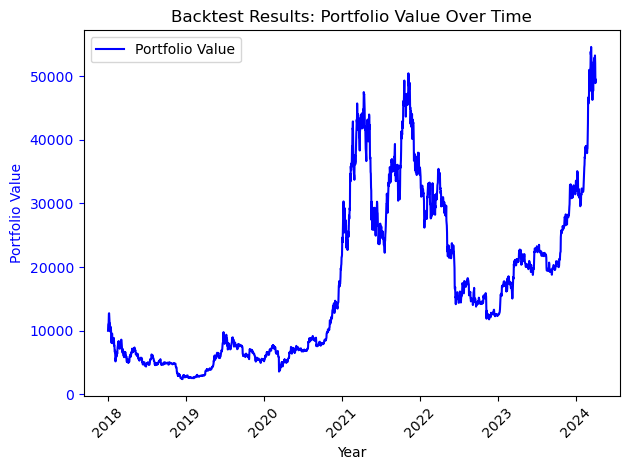

In [2]:
file_path = '../../data/crypto/csv/BTC_USDT_1d.csv'
market_data = MarketData(file_path)

# Initialize and run the strategy
macd_strategy = VanillaStrategy(market_data.data, start_date='2018-01-01')
backtest = Backtest(market_data.data, macd_strategy, start_date='2018-01-01', end_date=None, fee=2e-4, enable_logging=True)
# Assuming backtest and initial_capital are already defined
backtest.run()
portfolio = backtest.simulate_trades(initial_capital=10000)
metrics = backtest.calculate_metrics()

# Output metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Visualize the backtest
visualize_backtest(portfolio)